<a href="https://colab.research.google.com/github/Indiatsi/machine_learning/blob/CAT_1/CAT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import linear_model
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression

# Loading data from sklearn

In [ ]:
data = fetch_california_housing()
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

# Dealing with missing values

There are no missing values in this dataset.

# Feature Selection
This data only has numerical values. Encoding is not necessary.

In [ ]:
# Converting data into pandas data frame
x = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target
regressor = LassoCV()
regressor.fit(x, y)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

[ 4.35718812e-01  9.45189655e-03 -1.05456411e-01  6.35173670e-01
 -3.91648882e-06 -3.78474969e-03 -4.21155751e-01 -4.34216789e-01]
MedInc        0.435719
HouseAge      0.009452
AveRooms     -0.105456
AveBedrms     0.635174
Population   -0.000004
AveOccup     -0.003785
Latitude     -0.421156
Longitude    -0.434217
dtype: float64
L1 selected only  8  features out of  8  from the transformed dataset 


Text(0.5, 1.0, 'Feature Selection Using L1 Embedder')

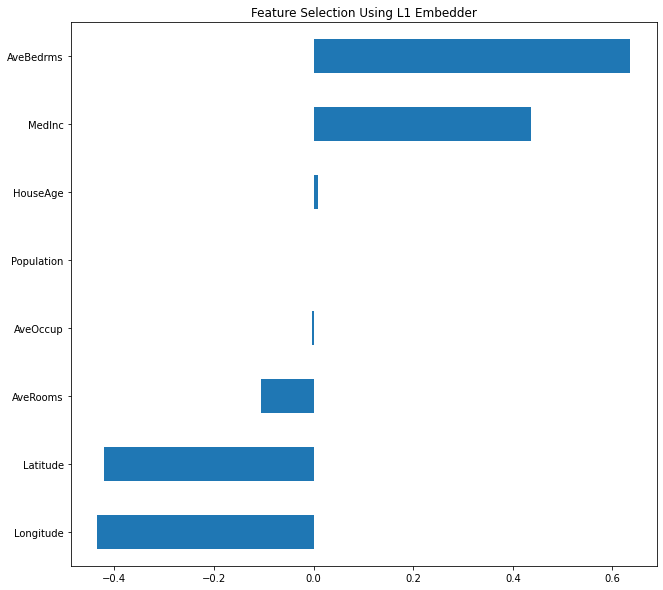

In [ ]:
coef_column = pd.Series(regressor.coef_, index = x.columns)
print(coef_column)
sorted_coef = coef_column.sort_values()
matplotlib.rcParams['figure.figsize'] = (10.5, 10.0)
sorted_coef.plot(kind = "barh")

no_of_selected_features = sum(coef_column != 0)
no_of_rejected_features = sum(coef_column == 0)
total_features = no_of_selected_features + no_of_rejected_features
print("L1 selected only ",no_of_selected_features," features out of ",total_features," from the transformed dataset ")
plt.title("Feature Selection Using L1 Embedder")

# Feature Extraction
Using PCA, 0.9

In [ ]:
pca_with_varia = PCA(0.9)
pca_with_varia.fit_transform(x)
pca_with_varia.n_components_

# define components
n_components = 3

In [ ]:
pca = PCA(n_components)
pc_s = pca.fit_transform(x)
pca_data = pd.DataFrame(pc_s,columns = ['PC1', 'PC2', 'PC3'])
target_data = pd.DataFrame(y, columns = ['Target'])
final_data = pd.concat([pca_data,target_data],axis=1)
final_data

,PC1,PC2,PC3,Target
0,-1103.512648,8.566636,-0.774104,4.526
1,975.541244,-4.670418,-1.025681,3.585
2,-929.549908,20.034651,-1.972737,3.521
3,-867.550048,20.331441,-2.314929,3.413
4,-860.550411,20.328827,-2.695158,3.422
...,...,...,...,...
20635,-580.462810,-5.452939,0.492803,0.781
20636,-1069.436815,-13.953253,2.368015,0.771
20637,-418.437575,-12.908256,1.019013,0.923
20638,-684.439525,-12.794581,0.974409,0.847


In [ ]:
pca.explained_variance_ratio_

array([9.99789327e-01, 1.13281110e-04, 8.32834638e-05])

In [ ]:
final_data.describe()

,PC1,PC2,PC3,Target
count,2.064000e+04,2.064000e+04,2.064000e+04,20640.000000
mean,1.237177e-13,-3.464929e-16,9.333942e-16,2.068558
std,1.132469e+03,1.205454e+01,1.033597e+01,1.153956
min,-1.422428e+03,-3.201997e+01,-2.870594e+01,0.149990
25%,-6.384857e+02,-9.532781e+00,-1.183778e+00,1.196000
50%,-2.594659e+02,5.933884e-01,-1.307700e-01,1.797000
75%,2.995021e+02,8.067277e+00,9.659725e-01,2.647250
max,3.425638e+04,1.788184e+02,1.223955e+03,5.000010


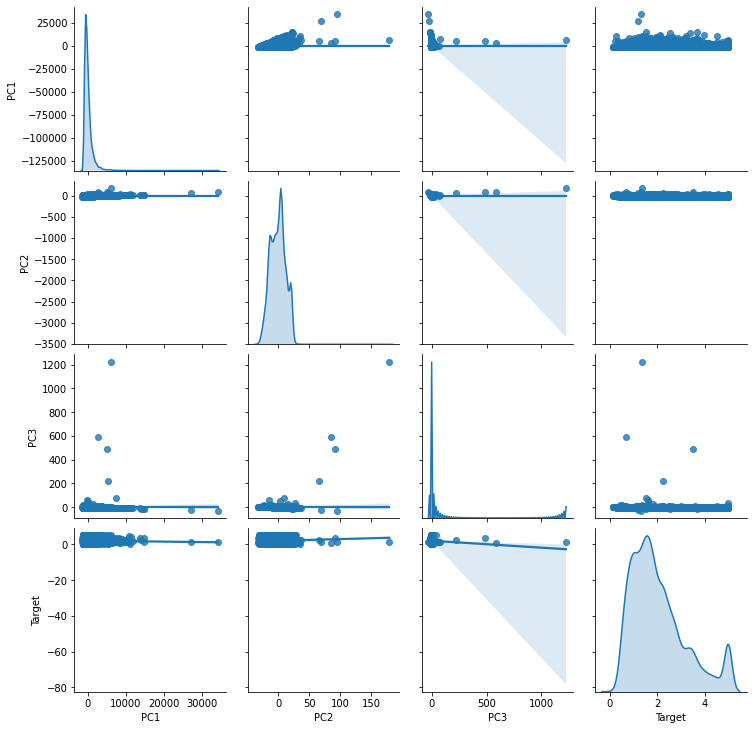

In [ ]:
sns.pairplot(final_data, kind='reg', diag_kind='kde')

In [ ]:
# Split data into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [ ]:
result = {}
models = {'LinearRegression':linear_model.LinearRegression(),
          'Lasso':linear_model.Lasso(),
          'Ridge':linear_model.Ridge()}

for i in models:
  models[i].fit(X_train, y_train)
  accuracy = models[i].score(X_test, y_test)
  result[i]=[accuracy]
pd.DataFrame(result)

,LinearRegression,Lasso,Ridge
0,0.219645,0.283403,0.219534


In [ ]:
kfold = KFold(n_splits = 9)
for i in models:
  regressor = models[i]
  c_validated = cross_val_score(regressor, X_train, y_train, cv = kfold)  
  accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

,LinearRegression,Lasso,Ridge
0,0.557754,0.284704,0.557763


In [ ]:
for i in models:
  regressor = models[i]
  if i == 'Lasso':
    lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03, 1.5],'max_iter':[1000, 1100, 1500, 2000],'tol':[0.001,0.0001,0.000001]}
    grid = GridSearchCV(regressor,param_grid=lasso_params,cv=2,n_jobs=-1)
    results = grid.fit(X_train,y_train)
    accuracy = results.score(X_test,y_test)
  else:    
    c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)  
    accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

,LinearRegression,Lasso,Ridge
0,0.557754,0.261321,0.557763


In [ ]:
for i in models:
  regressor = models[i]
  if i == 'Ridge':
    ridge_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03, 1.5], 'max_iter':[1000, 1100, 1500, 2000], 'tol':[0.001, 0.0001, 0.00001]}
    grid = GridSearchCV(regressor, param_grid= ridge_params, cv = 2, n_jobs = -1)
    results = grid.fit(X_train,y_train)
    accuracy = results.score(X_test,y_test)
  else:    
    c_validated = cross_val_score(regressor, X_train, y_train, cv = kfold)  
    accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

,LinearRegression,Lasso,Ridge
0,0.557754,0.284704,0.219478


In [ ]:
for i in models:
  regressor = models[i]
  if i == 'Lasso':
    random = RandomizedSearchCV(regressor, param_distributions = lasso_params, cv = 3, n_jobs = -1)
    results = random.fit(X_train,y_train)
    print(results.best_score_)
    print("Best Params are ", results.best_params_)
    accuracy = results.score(X_test,y_test)
  else:    
    c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)  
    accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

0.572055149105772
Best Params are  {'tol': 1e-06, 'max_iter': 2000, 'alpha': 0.03}


,LinearRegression,Lasso,Ridge
0,0.557754,0.261321,0.557763


In [ ]:
for i in models:
  regressor = models[i]
  if i == 'Ridge':
    random = RandomizedSearchCV(regressor, param_distributions = ridge_params, cv = 3, n_jobs = -1)
    results = random.fit(X_train,y_train)
    print(results.best_score_)
    print("Best Params are ", results.best_params_)
    accuracy = results.score(X_test,y_test)
  else:    
    c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)  
    accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

0.5711433018171287
Best Params are  {'tol': 0.0001, 'max_iter': 1100, 'alpha': 1.5}


,LinearRegression,Lasso,Ridge
0,0.557754,0.284704,0.219478


In [ ]:
regressor = RidgeCV()
best_fit = regressor.fit(X_train, y_train)

x = x.values.reshape(8, 20640)
w_1 = regressor.coef_[0]
w_2 = regressor.coef_[1]
b = regressor.intercept_
# print(w_1)
# print(w_2)
# print(x)

w = w_1 * x
y = w_2 * y

z = w + y + b

z

array([[-31.87397426, -17.57629122, -32.47161028, ..., -34.45928631,
        -17.67034787, -89.87523205],
       [-33.77697331, -25.8958913 , -32.96593612, ..., -33.94189639,
        -20.68729758, -87.34870087],
       [-34.84884431, -25.45801762, -34.08260319, ..., -34.36008692,
        -20.69605506, -87.29177729],
       ...,
       [-34.32917582, -25.45801762, -33.39842555, ..., -34.05688073,
        -21.03759653, -86.84952486],
       [-33.99411487, -28.96100713, -33.01368615, ..., -34.31630237,
        -19.24231441, -88.98634846],
       [-32.00187716, -20.64140704, -32.0660574 , ..., -34.41079323,
        -18.31840093, -88.64480698]])

In [ ]:
regressor.score(X_test, y_test)

0.21854626903790864